In [136]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Linear regression with PyTorch

In [137]:
tensor = torch.arange(0, 50, 0.5)
tensor

tensor([ 0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,
         4.0000,  4.5000,  5.0000,  5.5000,  6.0000,  6.5000,  7.0000,  7.5000,
         8.0000,  8.5000,  9.0000,  9.5000, 10.0000, 10.5000, 11.0000, 11.5000,
        12.0000, 12.5000, 13.0000, 13.5000, 14.0000, 14.5000, 15.0000, 15.5000,
        16.0000, 16.5000, 17.0000, 17.5000, 18.0000, 18.5000, 19.0000, 19.5000,
        20.0000, 20.5000, 21.0000, 21.5000, 22.0000, 22.5000, 23.0000, 23.5000,
        24.0000, 24.5000, 25.0000, 25.5000, 26.0000, 26.5000, 27.0000, 27.5000,
        28.0000, 28.5000, 29.0000, 29.5000, 30.0000, 30.5000, 31.0000, 31.5000,
        32.0000, 32.5000, 33.0000, 33.5000, 34.0000, 34.5000, 35.0000, 35.5000,
        36.0000, 36.5000, 37.0000, 37.5000, 38.0000, 38.5000, 39.0000, 39.5000,
        40.0000, 40.5000, 41.0000, 41.5000, 42.0000, 42.5000, 43.0000, 43.5000,
        44.0000, 44.5000, 45.0000, 45.5000, 46.0000, 46.5000, 47.0000, 47.5000,
        48.0000, 48.5000, 49.0000, 49.50

In [138]:
weight = 2
bias = 1

y = weight * tensor + bias
y

tensor([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
         37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
         49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
         61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
         73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
         85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
         97.,  98.,  99., 100.])

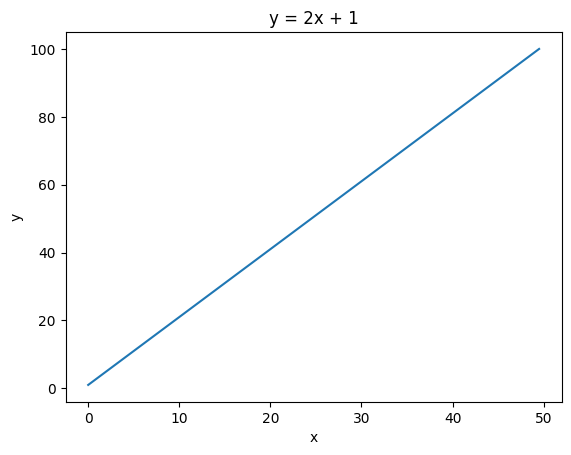

In [139]:
plt.plot(tensor, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = 2x + 1')
plt.show()

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tensor, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

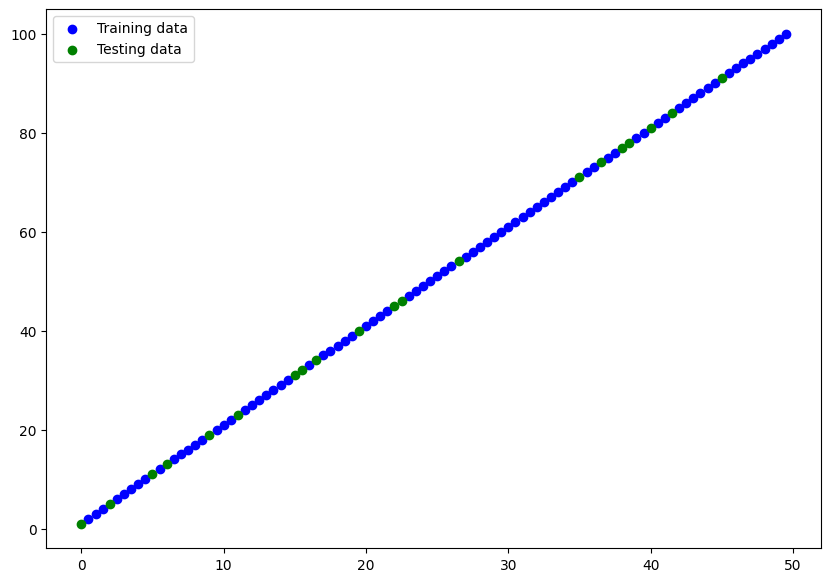

In [141]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()

plot_predictions()    

In [142]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

`torch.nn` - a neural networks library deeply integrated with autograd designed for maximum flexibility

`torch.nn.Parameter` - A kind of Tensor, that is automatically registered as a parameter when assigned as an attribute to a Module.

`torch.nn.Module` - Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.

`torch.optim` - A package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can be also easily integrated in the future.

`def forward()` - Defines the computation performed at every call, should be overridden by all subclasses.


## Checking contents of PyTorch model

In [143]:
torch.manual_seed(42)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [144]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Predicting with PyTorch model

In [145]:
with torch.inference_mode(): #switches of gradient calculation. Hence making the prediction faster. Can also use torch.no_grad()
    y_pred = model(X_test)

y_pred

tensor([14.1015,  9.0511, 11.9130,  7.7043,  7.5360,  6.6943,  3.8324, 13.5964,
         1.8123,  0.1288,  3.1590,  5.1792, 12.4180,  5.6842, 15.2799,  0.8022,
        12.9230, 13.0914,  2.1490,  5.3475])

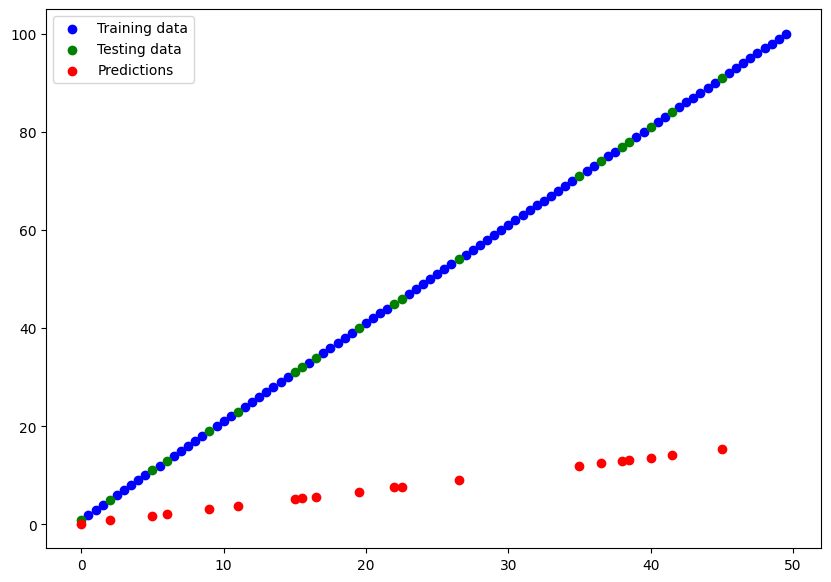

In [146]:
plot_predictions(predictions=y_pred)

## Model Optimization

1. [Loss function](https://neptune.ai/blog/pytorch-loss-functions): function that takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.
2. [Optimizer](https://pytorch.org/docs/stable/optim.html?highlight=optimizer#torch.optim.Optimizer): function that takes the model’s parameters and adjusts them in order to minimize the loss function.
m

In [147]:
loss_fn = nn.L1Loss()
optimzer = torch.optim.SGD(model.parameters(), lr=0.01)

## Training Loop and Testing Loop

1. Loop over the dataset multiple times.
2. Forwards pass: compute predicted outputs by passing inputs to the model.
3. Calculate the loss.
4. Optimizer zero gradients: reset gradients to zero.
5. Loss backwards pass: move backward through the network while computing the gradient of the loss with respect to each learnable parameter.
6. Optimizer step: to improve the model’s weights.

In [150]:
epochs = 10000

torch.manual_seed(42)
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()

    model.eval()

print(f"Loss: {loss}")
model.state_dict()

Loss: 5.943262577056885


OrderedDict([('weights', tensor([1.9852])), ('bias', tensor([0.8705]))])

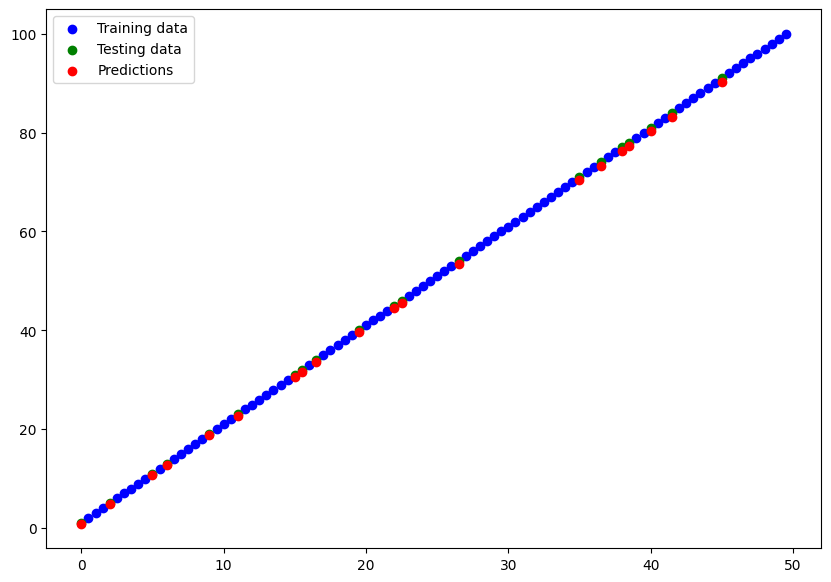

In [151]:
with torch.inference_mode():
    y_pred = model(X_test)

plot_predictions(predictions=y_pred)